# Evaluation Project - 2 (US Covid-19)

## UnitedStates_COVID_19_dataset

This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were such severe cases with the world already has faced. SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before. It is a contiguous virus which started from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high rate spreads throughout the world. Currently (on the date 20 May 2020), this leads to a total of 300K+ Deaths across the globe, including 90K+ deaths alone in USA.The dataset  is provided to identify the deaths and recovered cases.

## Objective

The objective of this project is to identify the deaths and recovered cases in the USA

In [1]:
#Let's import the necessary Libraries

#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np

#Data Visulaziation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Suppress warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

#Print all the libraries are imported successfully
print("Successfully imported Libraries")

Successfully imported Libraries


In [2]:
#Let's load the US Covid-19 data set

covid=pd.read_csv('US_COVID-19.csv')
print("Data Set is Successfully Loaded")

Data Set is Successfully Loaded


In [3]:
covid.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


### Data Description


**Province_State**  :  The name of the State within the USA.

**Country_Region**  :  The name of the Country (US).

**Last_Update**  :  The most recent date the file was pushed.

**Lat**  :  Latitude.

**Long_**  :  Longitude.

**Confirmed**  :  Aggregated confirmed case count for the state.

**Deaths**  :  Aggregated Death case count for the state.

**Recovered**  :  Aggregated Recovered case count for the state.

**Active**  :  Aggregated confirmed cases that have not been  
               resolved (Active = Confirmed - Recovered - Deaths).

**FIPS**  :  Federal Information Processing Standards code that  
             uniquely identifies counties within the USA.

**Incident_Rate**  :  confirmed cases per 100,000 persons.

**People_Tested**  :  Total number of people who have been tested.

**People_Hospitalized**  :  Total number of people hospitalized.

**Mortality_Rate**  :  Number recorded deaths * 100/ Number 
                       confirmed cases.

**UID**  :  Unique Identifier for each row entry.

**ISO3**  :  Officialy assigned country code identifiers.

**Testing_Rate**  :  Total number of people tested per 100,000 persons.

**Hospitalization_Rate**  :  Total number of people hospitalized * 
                             100/ Number of confirmed cases.

## Featured Engineering

### Data Preprocessing

In [4]:
covid.shape

(58, 18)

We have total of 58 rows and 18 columns in our dataset

In [5]:
#Let's check the value counts in each columns

for i in covid.columns:
    print(covid[i].value_counts())
    print('\n')

Diamond Princess            1
Michigan                    1
Tennessee                   1
Hawaii                      1
North Dakota                1
Maryland                    1
South Dakota                1
Colorado                    1
Connecticut                 1
Florida                     1
Texas                       1
Indiana                     1
Louisiana                   1
Alaska                      1
Virginia                    1
Grand Princess              1
Mississippi                 1
Rhode Island                1
Missouri                    1
Alabama                     1
Vermont                     1
Kansas                      1
Virgin Islands              1
Maine                       1
Arkansas                    1
North Carolina              1
California                  1
Northern Mariana Islands    1
Puerto Rico                 1
Ohio                        1
New York                    1
Idaho                       1
Montana                     1
Wyoming   

In [6]:
#Let's check the null vlaues in our dataset
covid.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

From the above we can observe that we have many null values in our dataset which we needs to be imputed

In [7]:
#Let's impute the NaN columns values

covid=covid.fillna(0)
covid.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,0.0,2.493766,84000002,USA,5063.940017,0.000000
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


We have successfully imputed the NaN column with the 0 beacuse the columns which are NaN are actully 0 as per the calculations (Confirmed-(Death+Active) and similarly for People Hospitalized rate

### Exploratory Data Analysis

In [8]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   58 non-null     float64
 4   Long_                 58 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             58 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         58 non-null     float64
 11  People_Tested         58 non-null     float64
 12  People_Hospitalized   58 non-null     float64
 13  Mortality_Rate        58 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

### From the above table we can observe the following:

    1- We have 58 rows and 18 columns in our data sets
       after the data is cleaned.
    
    2- We do no the have any null values in our data set.
    
    3- We have three types of data types (dtypes) in our 
       data set i.e int64, object and float64.

In [9]:
#Let's confirm that we do not have any null values in our dataset

covid.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

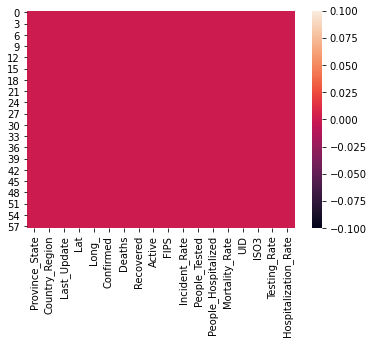

In [10]:
#Let's plot the heat map for null values

sns.heatmap(covid.isnull())
plt.show()

We can observe that we have successfully imputed all the null values and now there are no null values in our dataset

In [11]:
#Let's check the statistic matrix

covid.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000
mean,35.569741,-82.268455,26756.086207,1611.017241,5074.344828,20070.724138,3288.086207,382.567674,2.180654e+05,2786.482759,4.381382,7.676194e+07,3759.904564,8.160412
std,12.662834,51.328392,52562.031122,4084.750891,10393.125384,41294.705318,17408.350591,402.221849,2.964241e+05,10177.988015,2.195667,2.378302e+07,2029.719694,8.101621
min,-14.271000,-170.132000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,1.600000e+01,0.000000,0.000000
25%,33.761575,-99.697700,2596.000000,74.000000,0.000000,812.500000,18.250000,139.910412,4.166725e+04,0.000000,2.952622,8.400001e+07,2649.226598,0.000000
50%,38.978600,-86.797300,10148.500000,385.000000,1079.500000,5644.500000,32.500000,244.809981,1.334500e+05,178.500000,4.382399,8.400003e+07,3440.890063,8.403869
75%,42.214075,-75.830850,29395.500000,1394.250000,4383.750000,19291.250000,47.750000,462.828082,2.620348e+05,1722.750000,5.450908,8.400004e+07,4622.586404,15.552021
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


### Observations:
    
    1- Standard Deviation is maxium for the People Tested,   
       followed by Confirmed cases it means the data is 
       spread throughout and is not clustered aroung the
       mean.
    
    2- After oberving the 50% and Max values of Confirmed,
       Death, Recovered and Active cases we can clearly
       say that wae have outliers present in our data set.
        
    3- Mean for all the columns is greater than the median
       so it means  our data is positively skewed except
       for the Mortality rate and Hospitalization rate
       columns as it is negatively skewed.
    
    4- Count of all the columns confirm our above analysis
       that there are no null values.

In [12]:
#Let's check the correlation

covid.corr().style.background_gradient(cmap='coolwarm')

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
Lat,1.000000,-0.387390,0.153491,0.141302,0.122877,0.150468,-0.534868,0.301152,0.145980,0.095320,0.169965,0.621164,0.433706,0.244780
Long_,-0.387390,1.000000,-0.020091,0.004367,-0.035159,-0.017156,0.305374,-0.016711,-0.116179,0.016002,0.254080,-0.482885,0.061531,-0.180340
Confirmed,0.153491,-0.020091,1.000000,0.982191,0.756823,0.985218,-0.096696,0.714239,0.829562,0.846476,0.386823,0.153972,0.345215,0.144106
Deaths,0.141302,0.004367,0.982191,1.000000,0.782292,0.954378,-0.075053,0.711955,0.742859,0.888548,0.425715,0.120043,0.348798,0.164596
Recovered,0.122877,-0.035159,0.756823,0.782292,1.000000,0.634259,-0.092894,0.527055,0.601959,0.688997,0.312402,0.150011,0.284562,0.067486
Active,0.150468,-0.017156,0.985218,0.954378,0.634259,1.000000,-0.092276,0.706045,0.830926,0.816137,0.371632,0.146354,0.333286,0.150159
FIPS,-0.534868,0.305374,-0.096696,-0.075053,-0.092894,-0.092276,1.000000,-0.181226,-0.140195,-0.052146,-0.246082,0.058022,-0.352595,-0.191941
Incident_Rate,0.301152,-0.016711,0.714239,0.711955,0.527055,0.706045,-0.181226,1.000000,0.455484,0.534802,0.416559,0.249272,0.635041,0.122181
People_Tested,0.145980,-0.116179,0.829562,0.742859,0.601959,0.830926,-0.140195,0.455484,1.000000,0.611581,0.272874,0.225064,0.263276,0.096457
People_Hospitalized,0.095320,0.016002,0.846476,0.888548,0.688997,0.816137,-0.052146,0.534802,0.611581,1.000000,0.286447,0.084782,0.281492,0.383666


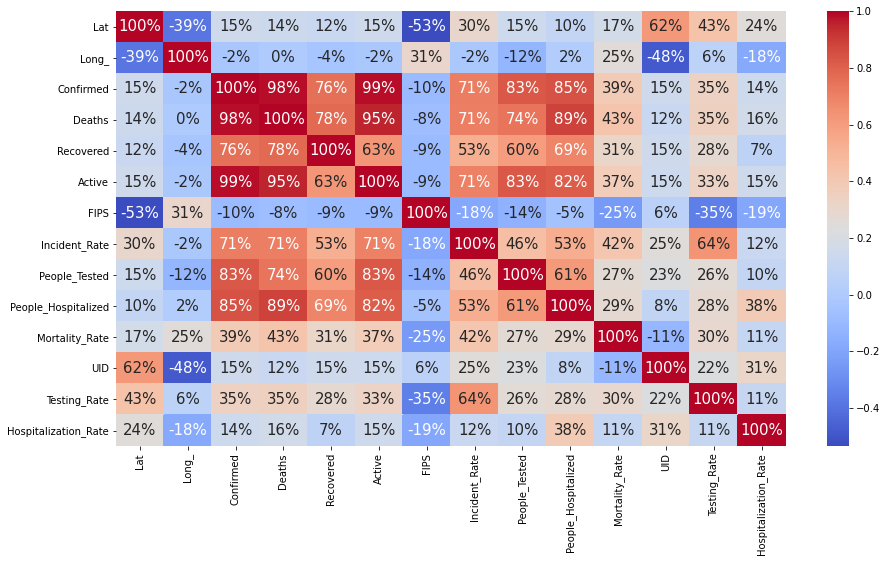

In [13]:
#Let's plot the heat map for correlation

plt.figure(figsize=(15,8))
#sns.set(font_scale=3.5)
sns.heatmap(covid.corr(),annot=True,cmap='coolwarm',annot_kws={"size":15},fmt='0.0%');

### Observations:
    
    1- Number of cases Confirmed, Active and Deaths have strong 
       positive correlation with each others. It measn if the 
       confirmed cases will increase their correlated vales will
       also increase.
        
    2- IT's not suprising we do not have any negative correlation
       in between our features.
        
    3- Peoplr Tested and People Hospitalized also have moderate
       positive correlation with each other.
    
    4- Active cases also has moderate positive correlation with
       the People Tested and People Hospitalized

## Data Visulalization

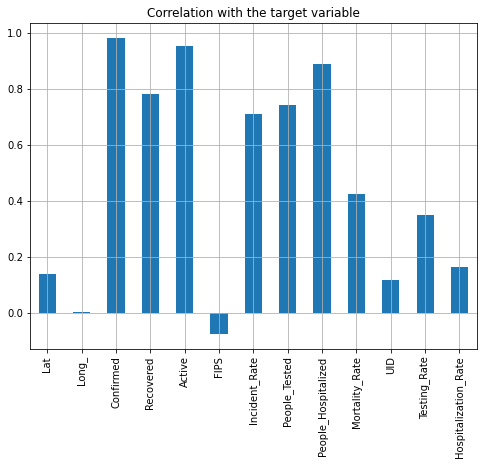

In [14]:
plt.figure(figsize=(8,6))
covid.drop('Deaths',axis=1).corrwith(covid['Deaths']).plot(kind='bar',grid=True)
plt.title("Correlation with the target variable");

We can observe that only FIPS has negative correlation with the target variable other have positive correlation with the Number of Deaths

In [15]:
covid_sum = covid.groupby('Province_State').agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum','Active':'sum'})
covid_sum

,Confirmed,Deaths,Recovered,Active
Province_State,,,,
Alabama,13052,522,0.0,12530.0
Alaska,401,10,352.0,39.0
American Samoa,0,0,0.0,0.0
Arizona,14906,747,3773.0,10386.0
Arkansas,5003,107,3852.0,1044.0
California,85997,3497,0.0,82500.0
Colorado,22797,1299,3478.0,18020.0
Connecticut,39017,3529,6264.0,29224.0
Delaware,8194,310,3965.0,3919.0


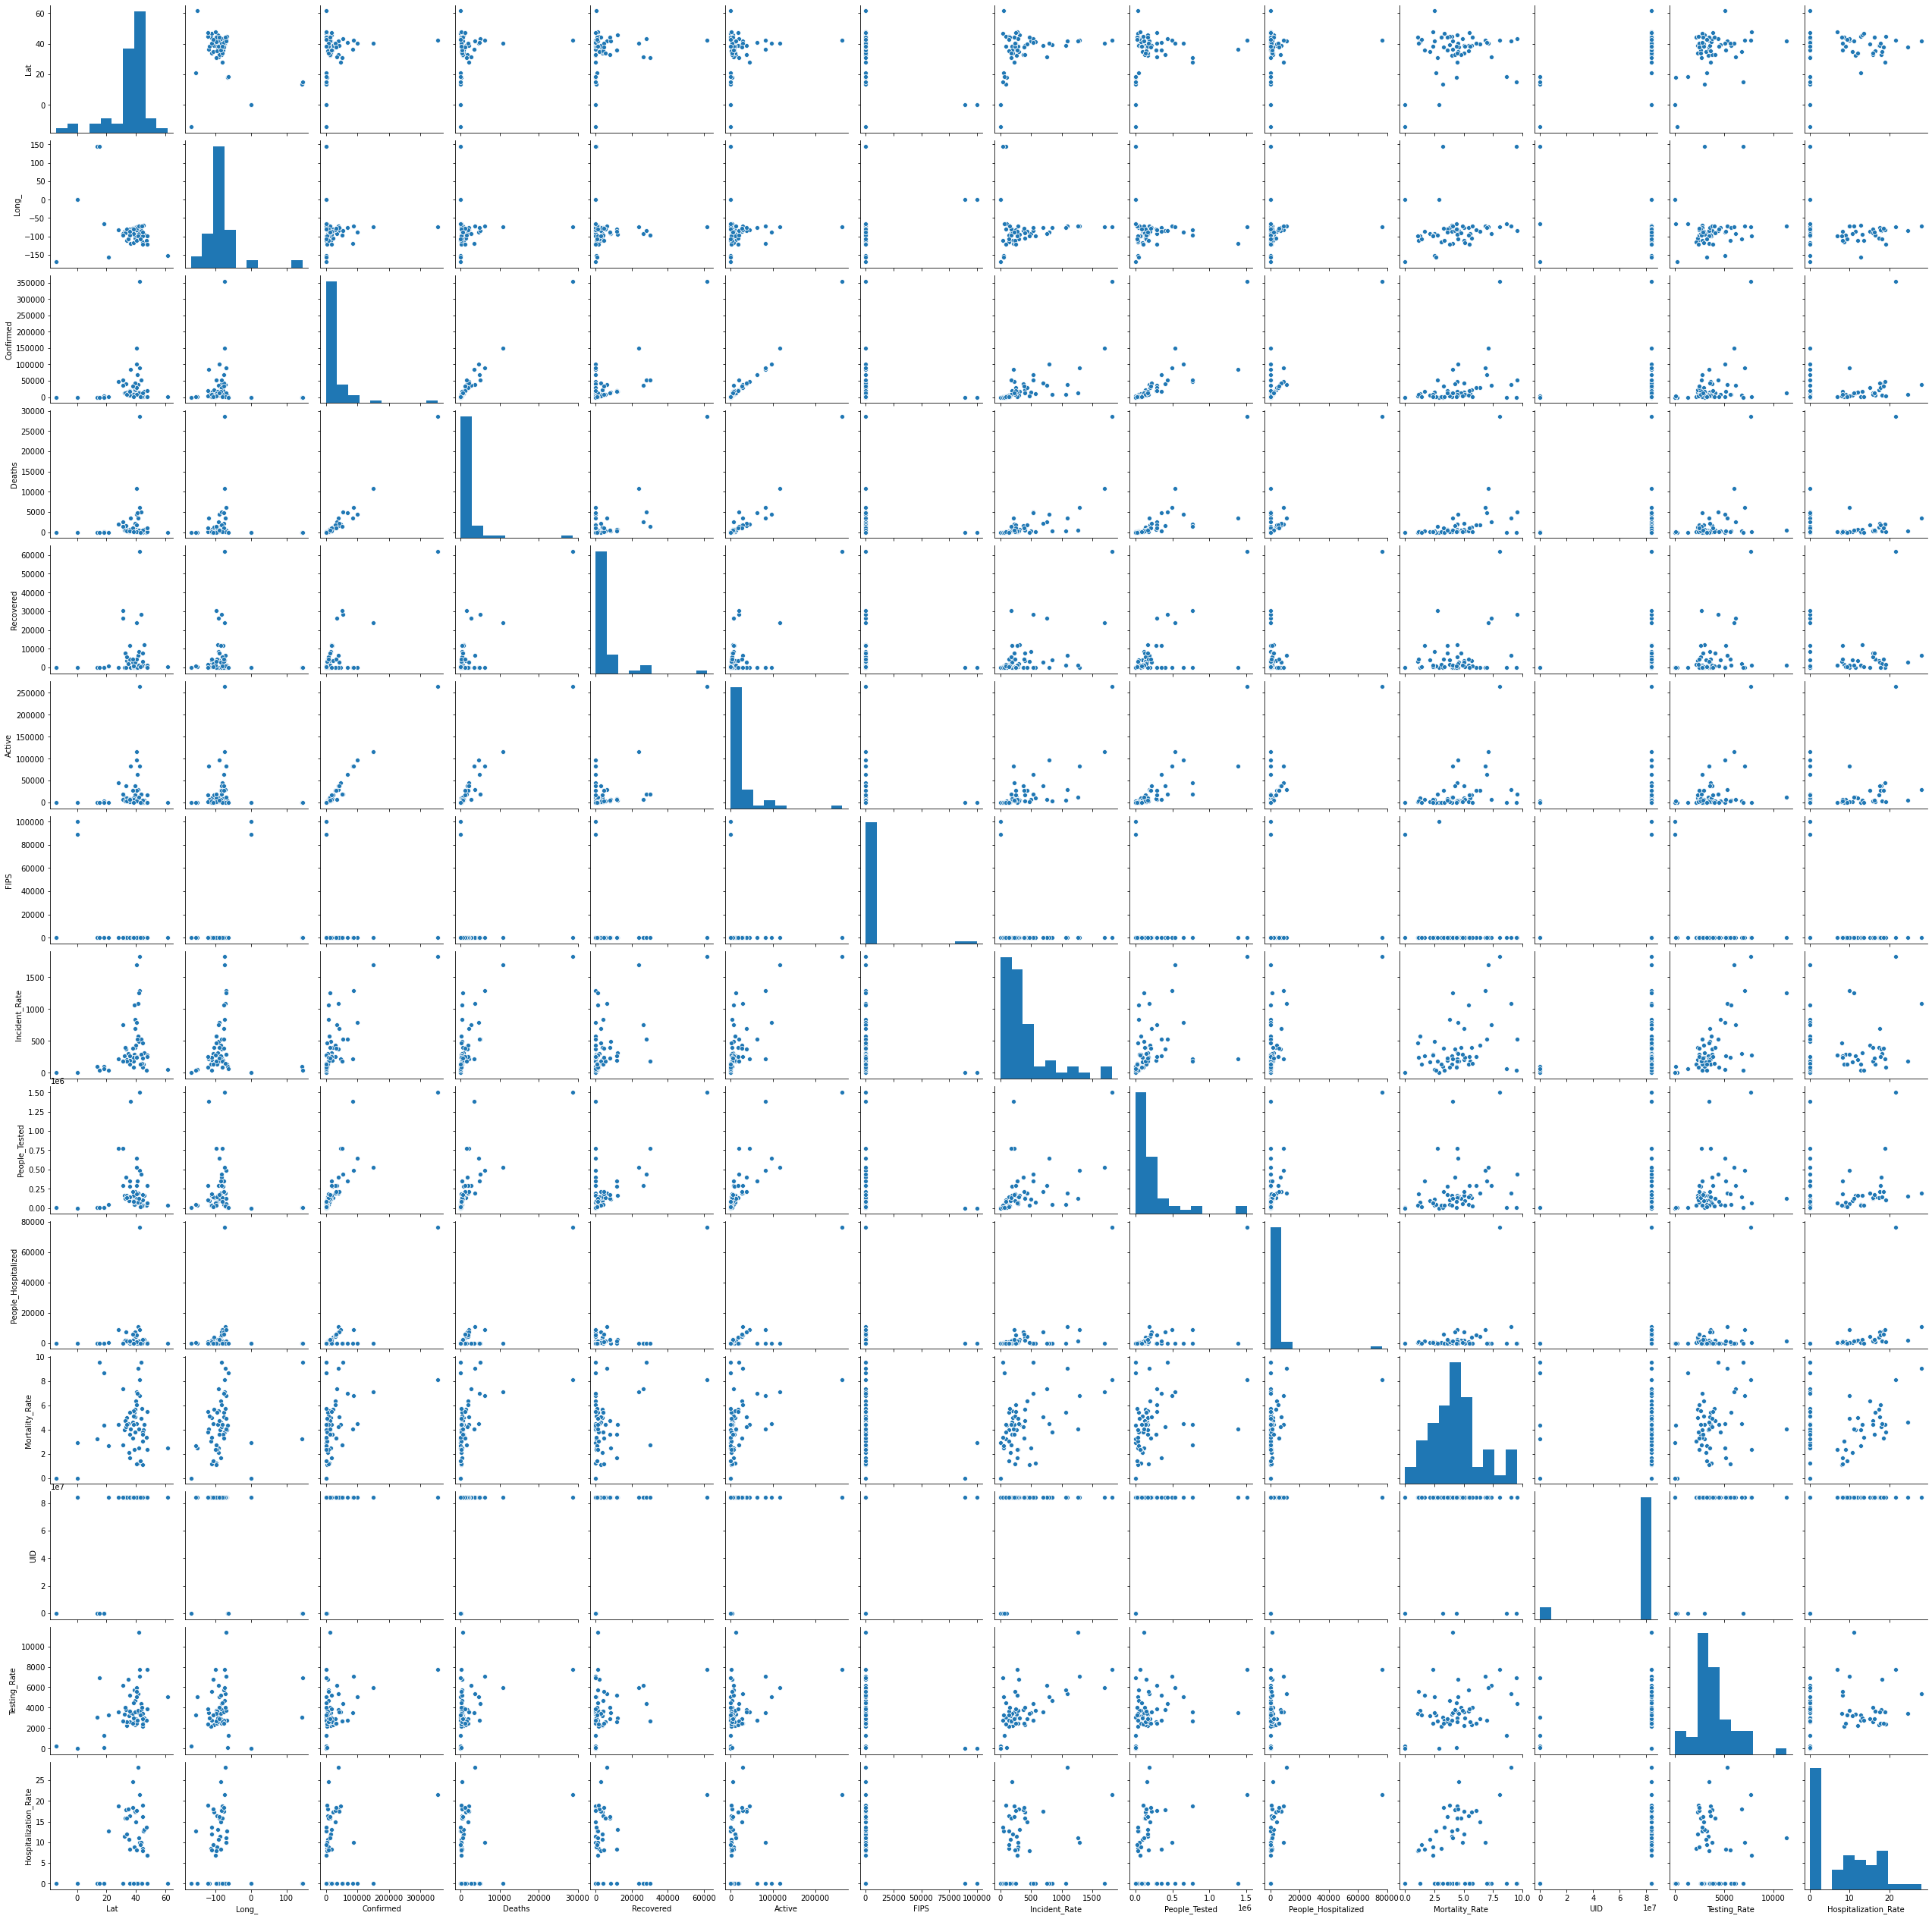

In [16]:
#Let's plot the pair plot of our dataset

sns.pairplot(covid);

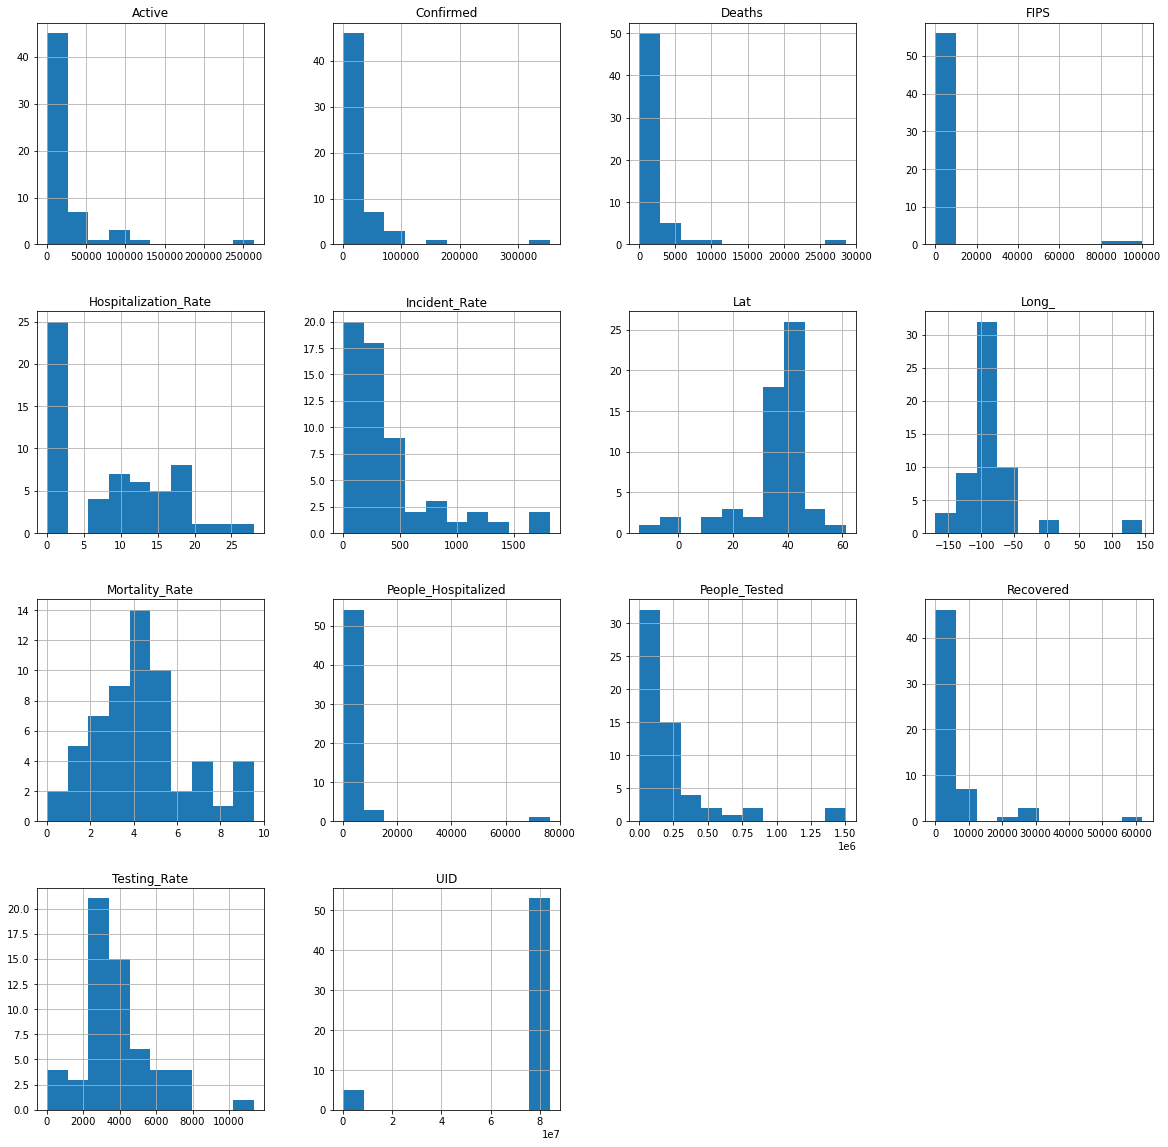

In [17]:
#Let's plot the histogram plot of our dataset

covid.hist(figsize=(20,20));

From the above we can observe that we do not have normal distibution for any of our features and most of the data are positively skewed.

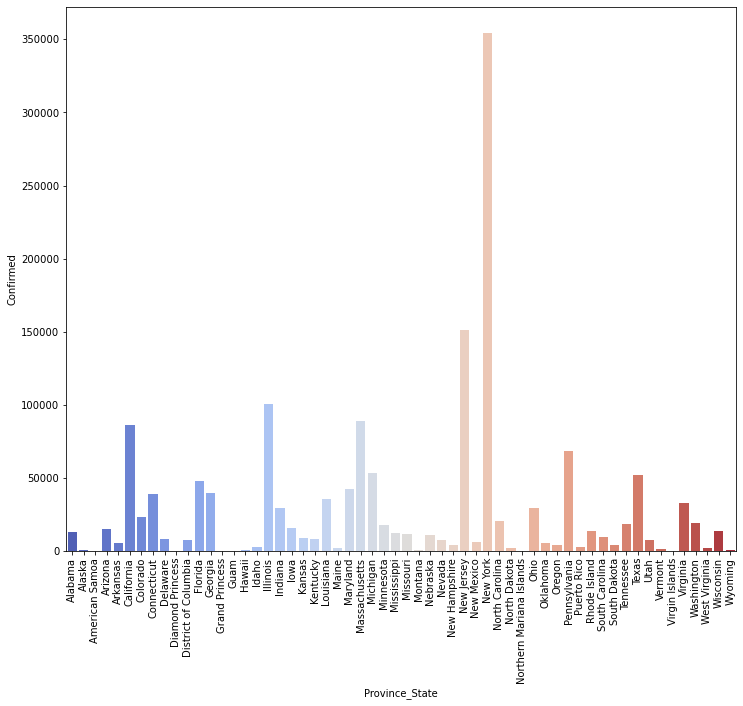

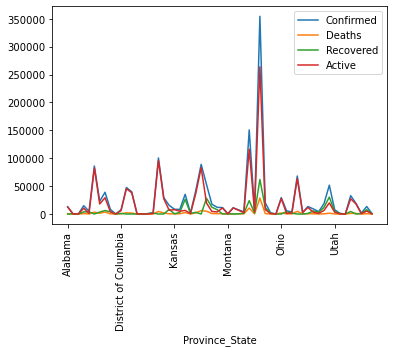

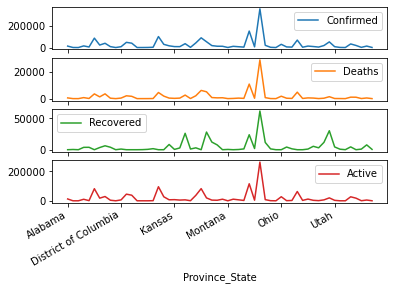

In [18]:
fig=plt.figure(figsize=(12,10))
sns.barplot(x='Province_State',y='Confirmed',data=covid, palette='coolwarm');
#plt.rcParams.update({'font.size': 12});
plt.xticks(rotation=90)
print('\n')
covid_plot = covid_sum.loc[:,:]
covid_plot.plot();
plt.xticks(rotation=90)
print('\n')
covid_plot.plot(subplots=True);

From the above two plots we can observe that New York (more than 0.35 million cases)and New Jersey (more than 0.15 million cases) have the most number of Confirmed, Active and Death cases as compared with all the states in US

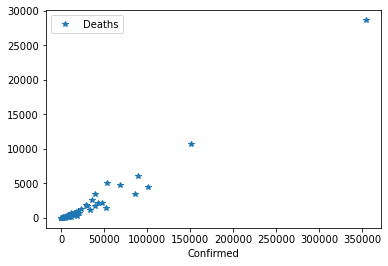

In [19]:
covid.plot(x='Confirmed', y='Deaths', style='*');

We can observe that with the increase in number of confirmed cases the number of deaths cases also increased

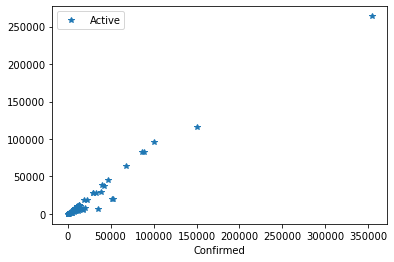

In [20]:
covid.plot(x='Confirmed', y='Active', style='*');

We can observe that with the inrease in number of confirmed cases the number of Active cases also increased

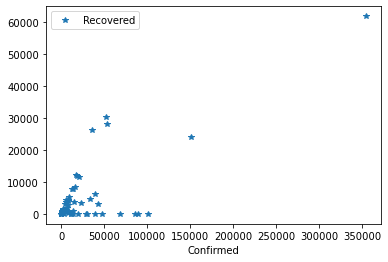

In [21]:
covid.plot(x='Confirmed', y='Recovered', style='*');

We can observe that with the inrease in number of confirmed cases the number of recovered cases also increased

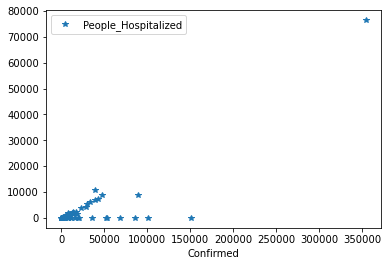

In [22]:
covid.plot(x='Confirmed', y='People_Hospitalized', style='*');

 We can observe that with the increae in the number of confirmed case the people hospitalized are decreased

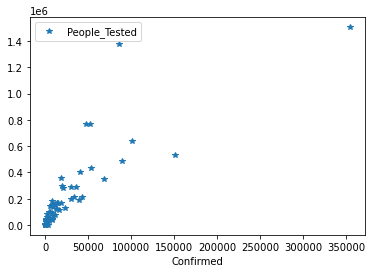

In [23]:
covid.plot(x='Confirmed', y='People_Tested', style='*');

We can observe that with the increase in number of confirmed cases People tested are clustered at the initial time when cases were less

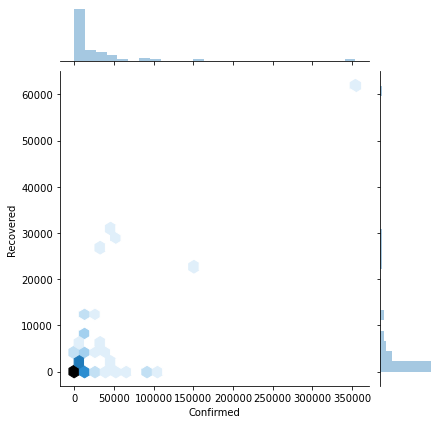

In [24]:
sns.jointplot(covid['Confirmed'],covid['Recovered'],kind = 'hex');

We can observe that the in the initial stage the number of confirmed cases and recovered cases are clustered and with increase in confirmed case the number of cases also recovered

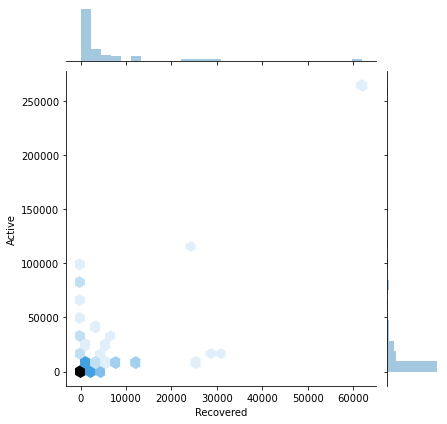

In [25]:
sns.jointplot(covid['Recovered'],covid['Active'],kind = 'hex');

We can observe that active cases are increasing rapidly as compared to number of recovered cases. It means in the US the recovery rate is very low

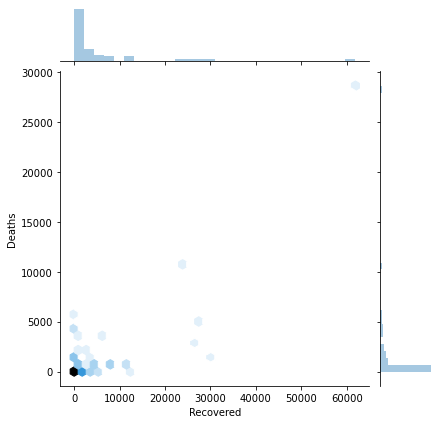

In [26]:
sns.jointplot(covid['Recovered'],covid['Deaths'],kind = 'hex');

In [27]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   58 non-null     float64
 4   Long_                 58 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             58 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         58 non-null     float64
 11  People_Tested         58 non-null     float64
 12  People_Hospitalized   58 non-null     float64
 13  Mortality_Rate        58 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

#### From the above table we can observe the following:

    1- We have 58 rows and 18 columns in our data sets
       after the data is cleaned.
    
    2- We do no the have any null values in our data set.
    
    3- We have three types of data types (dtypes) in our 
       data set i.e int64, object and float64.

In [28]:
#Let's drop the unnecessary columns whihc are not required for our analysis

covid.drop(['Last_Update','Lat','Long_','FIPS','UID','ISO3'],inplace=True,axis=1)

In [29]:
#Let's drop the state and region for further processing and model prepration

covid.drop(['Province_State','Country_Region'],inplace=True,axis=1)

In [30]:
covid.head()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,13052,522,0.0,12530.0,266.194321,164450.0,1493.0,3.999387,3353.942386,11.438860
1,401,10,352.0,39.0,54.815493,37045.0,0.0,2.493766,5063.940017,0.000000
2,0,0,0.0,0.0,0.000000,124.0,0.0,0.000000,222.857246,0.000000
3,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,2272.859351,12.022005
4,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,3189.670370,10.693584


### Plotting Outliers

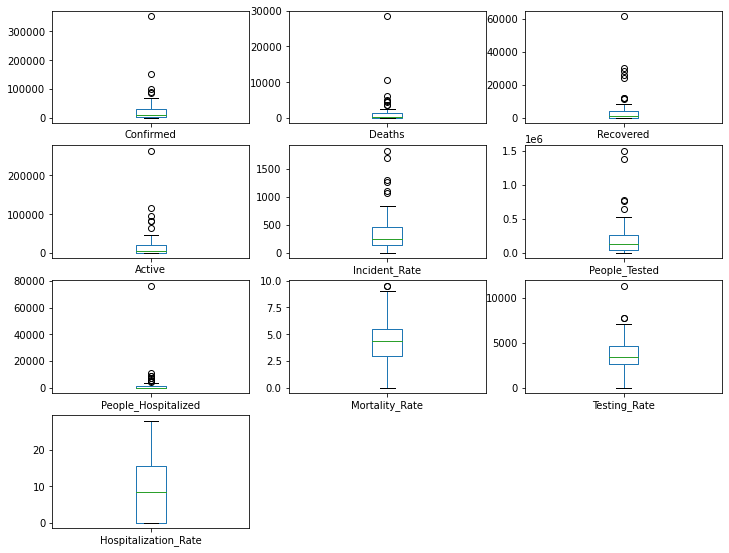

In [31]:
#Let's check the outliers

covid.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))
plt.show()

## Since we have very less dataset so we are not going to treat any outliers

In [32]:
#Let's check the skewness of our DataSet

covid.skew()

Confirmed               4.708614
Deaths                  5.489201
Recovered               3.649556
Active                  4.180953
Incident_Rate           1.961954
People_Tested           2.812214
People_Hospitalized     6.885993
Mortality_Rate          0.400879
Testing_Rate            1.024775
Hospitalization_Rate    0.407078
dtype: float64

In [33]:
# Let's treat the skewness

covid.skew()
for col in covid.skew().index:
    if col in covid.describe().columns:
        if covid[col].skew()>0.55:
            covid[col]=np.sqrt(covid[col])
        if covid[col].skew()<-0.55:
            covid[col]=np.cbrt(covid[col])  

In [34]:
#Let's recheck the skewness of our DataSet

covid.skew()

Confirmed               1.901107
Deaths                  2.496421
Recovered               1.614872
Active                  1.818910
Incident_Rate           0.730818
People_Tested           1.110590
People_Hospitalized     3.317885
Mortality_Rate          0.400879
Testing_Rate           -3.599012
Hospitalization_Rate    0.407078
dtype: float64

We have successfully removed the skewness from our dataset

## Model Prepreation and Modelling

In [35]:
#Let's assign the value of x and y for training and testing

x = covid.drop(['Deaths'],axis=1)
y = covid['Deaths']

In [36]:
#Let's split the data for testing and training

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [37]:
# Let's scale the data using standard scaler

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)
x_sc=pd.DataFrame(x_sc,columns=x.columns)

In [38]:
#Lets import all the metrics and regressors

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [39]:
#Let's model using multiple Algorithms 

model = [LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),RandomForestRegressor(),Lasso(),Ridge(),ElasticNet()]

for m in model:
    m.fit(x_train,y_train)
    print("Score of ",m,"is:",m.score(x_train,y_train))
    predm = m.predict(x_test)
    print('Error')
    print('Mean Absolute Error: ', mean_absolute_error(y_test,predm))
    print('Mean squared Error: ', mean_squared_error(y_test,predm))
    print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,predm)))
    print('R2 Score:',r2_score(y_test,predm))
    print('*************************************************************************')
    print('\n')

Score of  LinearRegression() is: 0.9843593115392872
Error
Mean Absolute Error:  4.892621774847915
Mean squared Error:  32.460146162394445
Root Mean Absolute Error:  2.2119271630973554
R2 Score: 0.9538818222278453
*************************************************************************


Score of  DecisionTreeRegressor() is: 1.0
Error
Mean Absolute Error:  7.859002565591152
Mean squared Error:  158.35212712351606
Root Mean Absolute Error:  2.8033912615957037
R2 Score: 0.7750191415422003
*************************************************************************


Score of  KNeighborsRegressor() is: 0.7354589642837241
Error
Mean Absolute Error:  10.548881250919129
Mean squared Error:  223.94581574331255
Root Mean Absolute Error:  3.24790413203948
R2 Score: 0.6818260493926735
*************************************************************************


Score of  SVR() is: 0.20354006459746676
Error
Mean Absolute Error:  13.766915237455606
Mean squared Error:  551.4708473957004
Root Mean Absol

## From the above output after comparing the R2 Score and Errors (MAE, MSE, RMAE) of all the model we found out that Lasso Model is performing best with the very less errors and 98.36% accuracy. So we are going to choose lassso model.

In [40]:
# Lasso model is giving best result so finding its best parameters using GridsearchCV

lasso=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':range(2,58)}
clf=GridSearchCV(lasso,parameters)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1, 'random_state': 2}

### We have hyper tune our Lasso model and with best parameters we will run our model again

In [41]:
#using Lasso model with best results

lasso=Lasso(alpha=0.1,random_state=2)
lasso.fit(x_train,y_train)
print("Score:",lasso.score(x_train,y_train))
predla = lasso.predict(x_test)
print('*******************************************************************')
print('Mean Absolute Error: ', mean_absolute_error(y_test,predla))
print('Mean squared Error: ', mean_squared_error(y_test,predla))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,predla)))
print('*******************************************************************')
print('R2 Score:',r2_score(y_test,predla))    

Score: 0.9842966842920926
*******************************************************************
Mean Absolute Error:  4.551394912764731
Mean squared Error:  28.590880418323128
Root Mean Absolute Error:  2.1333998483089687
*******************************************************************
R2 Score: 0.9593791322072908


## We can observe the our model is performing very well

In [42]:
#Let's cross validate the Lasso model

score=cross_val_score(lasso,x,y,cv=4,scoring='r2')
print('Score:',score)
print('Mean Score',score.mean())
print('Standard Deviation',score.std())

Score: [0.91109729 0.94722732 0.95707857 0.73902813]
Mean Score 0.8886078280792042
Standard Deviation 0.08804025798932187


### We will now use AdaBoost Regressor to boost our score

In [43]:
#USing Adaboost to boost our score

adb=AdaBoostRegressor(base_estimator=lasso,n_estimators=20,learning_rate=0.1,random_state=2)
adb.fit(x_train,y_train)
print("Score:",adb.score(x_train,y_train))
predadb = adb.predict(x_test)
print('*******************************************************************')
print('Mean Absolute Error: ', mean_absolute_error(y_test,predadb))
print('Mean squared Error: ', mean_squared_error(y_test,predadb))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,predadb)))
print('*******************************************************************')
print('R2 Score:',r2_score(y_test,predadb))    

Score: 0.9590870201863618
*******************************************************************
Mean Absolute Error:  3.959566376340536
Mean squared Error:  24.866161167157205
Root Mean Absolute Error:  1.9898659191866512
*******************************************************************
R2 Score: 0.9646710758638983


### Let's crossvalidate our AdaBoostModel score

In [44]:
# Let's cross validate AdaBoosterRegressor

score=cross_val_score(adb,x,y,cv=4,scoring='r2')
print('Score:',score)
print('Mean Score',score.mean())
print('Standard Deviation',score.std())

Score: [0.90500459 0.94964933 0.95890646 0.82395602]
Mean Score 0.909379100841347
Standard Deviation 0.05336405352892525


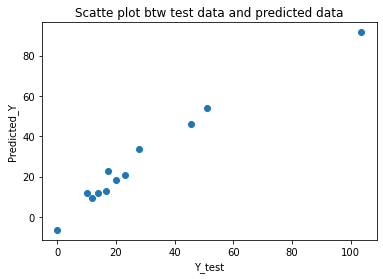

In [45]:
#Plotting Scatter plot between Test Data and predicted Data for Adaboost Regressor

plt.scatter(y_test,predadb)
plt.xlabel('Y_test')
plt.ylabel('Predicted_Y')
plt.title("Scatte plot btw test data and predicted data")
plt.show()

## So Our model is performing very well on test as well as train data with an accuracy of more than 95% 

In [46]:
#Let's save the model

import joblib

#save the model as a pickle in a file
joblib.dump(lasso,'US_Covid-19.pkl')

['US_Covid-19.pkl']